In [1]:
from swarms import SizeDistribution
from swarms import CollSwarm
from numpy import linspace, zeros, logspace
import matplotlib.pyplot as plt

# Jupiter: An Example

For the following plots, the specifications of Jupiter will be used to demonstrate the different possible plots that swarms.py can produce. 

In [3]:
Dmin = 12e-6; Dmax = 15e4; M_init = 7.37307e19

jupiter = SizeDistribution(Dmin, Dmax, M0=M_init)

In [5]:
initial_swarm_mass = jupiter.Mtot()
initial_swarm_area = jupiter.Atot()
print("Swarm mass = {0:.5e} kg".format(initial_swarm_mass))
print("Swarm area = {0:.5e} m^2".format(initial_swarm_area))

Swarm mass = 7.39324e+19 kg
Swarm area = 9.18122e+16 m^2


## Area Plot

One can plot the total surface area of a swarm over time by repeatedly updating the swarm for every needed time step and record the specific area at that time. There is the option to specify a dynamic maximum object size that would decrease over time as specified in Kennedy 2010.

In [4]:
M0 = 7.37307e19; Dt = 100.; Dmax = 150000.; L_s = 3.828e26;
M_s = 1.989e30; M_pl = 1.89587112e27; a_pl = 7.7792e11
R_pl = 6.9911e7; eta = 0.4; Nstr = 6.; d_pl = a_pl

jupiter_correct = CollSwarm(M0, Dt, Dmax, L_s, M_s, M_pl, a_pl, R_pl, eta, Nstr, d_pl, correction=True)
jupiter_no_correct = CollSwarm(M0, Dt, Dmax, L_s, M_s, M_pl, a_pl, R_pl, eta, Nstr, d_pl, correction=False)

In [5]:
time = linspace(0, 1e10, 50000)
area_correct = zeros(50000)
area_no_correct = zeros(50000)

for i in range(len(time)):
    a = jupiter_correct.computeAtot()*4.4683677582981e-23 # change units into AU
    b = jupiter_no_correct.computeAtot()*4.4683677582981e-23 # change units into AU
    area_correct[i] = a
    area_no_correct[i] = b
    jupiter_correct.updateSwarm(time[i])
    jupiter_no_correct.updateSwarm(time[i])

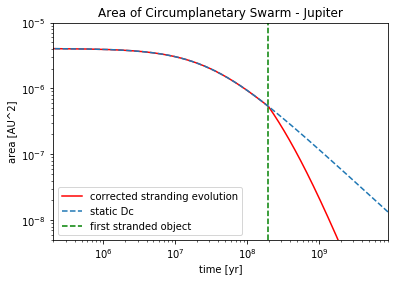

In [6]:
plt.loglog(time, area_correct, 'r', label="corrected stranding evolution")
plt.loglog(time, area_no_correct, ls='--', label="static Dc")
plt.axvline(jupiter_correct.tnleft, color='g', ls='--', label="first stranded object")
plt.xlabel("time [yr]")
plt.ylabel("area [AU^2]")
plt.title("Area of Circumplanetary Swarm - Jupiter")
plt.legend()
plt.xlim([2e5, 9e9])
plt.ylim([5e-9, 1e-5])
plt.show()

## Number Density Plot

Since it is possible to compute the number of objects in the swarm at any time with our code, an other possible plot that can be made is a size-distribution plot for logarithmic spaced times. 

In [8]:
jupiter_num = CollSwarm(M0, Dt, Dmax, L_s, M_s, M_pl, a_pl, R_pl, eta, Nstr, d_pl, correction=True)

In [9]:
drange = linspace(0.1, 250000, 5000)
time_log = logspace(0, 10, 20)
num_distribution = []
for i in range(len(time_log)):
    jupiter_num.updateSwarm(time_log[i])
    num = []
    for j in range(len(drange)):
        num.append(jupiter_num.computen(drange[j]))
    num_distribution.append(num)

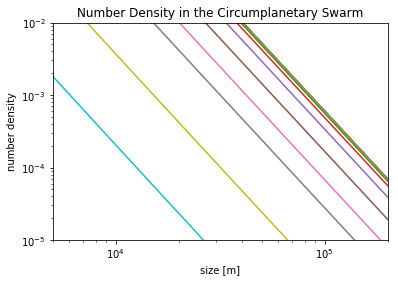

In [10]:
for i in range(len(num_distribution)):
    plt.loglog(drange, num_distribution[i])
plt.xlim([5000, 200000])
plt.ylim([1e-5, 1e-2])
plt.xlabel("size [m]")
plt.ylabel("number density")
plt.title("Number Density in the Circumplanetary Swarm")
plt.show()

# Observable Quantities

## Flux Computations

We now demonstrate the important computations of thermal radiation flux as well as scattering flux produced by both the planet and the circumplanetary swarm. These values are critical, since they are the observable variables. The distance from the solar system, d_pl, used is 10 pc. We take a Jupiter mass planet orbiting an A5 main-sequence star.  

In [2]:
M0 = 10 * 7.34767309e22; Dt = 100.; Dmax = 250000.; L_s = 20 * 3.828e26;
M_s = 1.86 * 1.989e30; M_pl = 1.89587112e27; a_pl = 7.48e12
R_pl = 6.9911e7; eta = 0.4; Nstr = 6.; d_pl = 3.086e17

jupiter5 = CollSwarm(M0, Dt, Dmax, L_s, M_s, M_pl, a_pl, R_pl, eta, Nstr, d_pl, correction=True)

jupiter5.updateSwarm(1e7) # Update the swarm to 4.5e9 years. 

waverange = logspace(-7, -3, 200)
Fth_planet = jupiter5.computeFth(waverange, planet=True)/1e-26
Fth_swarm = jupiter5.computeFth(waverange, swarm=True)/1e-26
Fs_planet = jupiter5.computeFs(waverange, 1., 0.52, planet=True)/1e-26
Fs_swarm = jupiter5.computeFs(waverange, 0.32, 0.08, swarm=True)/1e-26

C:\Users\loloynage\Documents\CE-Irregular-Satellites\swarms.py:210: RuntimeWarning: overflow encountered in exp
  b = 1/(exp(h*(c/lamb)/(k_B*T)) - 1)


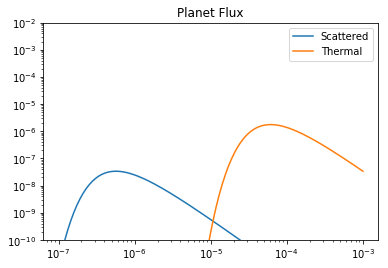

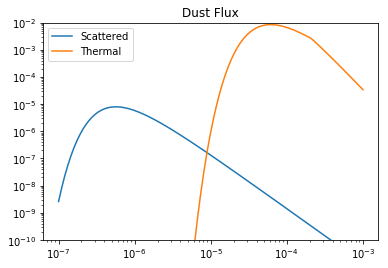

In [3]:
plt.figure(3)
plt.title('Planet Flux')
plt.loglog(waverange, Fs_planet, label="Scattered")
plt.loglog(waverange, Fth_planet, label="Thermal")
plt.ylim([10e-11, 10e-3])
plt.legend()
plt.show()

plt.figure(4)
plt.title('Dust Flux')
plt.loglog(waverange, Fs_swarm, label="Scattered")
plt.loglog(waverange, Fth_swarm, label="Thermal")
plt.ylim([10e-11, 10e-3])
plt.legend()
plt.show()

# Evolution of Debris Population

In [2]:
M0 = 7.37307e19; Dt = 100.; Dmax = 150000.; L_s = 3.828e26;
M_s = 1.989e30; M_pl = 1.89587112e27; a_pl = 7.7792e11
R_pl = 6.9911e7; eta = 0.4; Nstr = 6.; d_pl = a_pl

jupiter6 = CollSwarm(M0, Dt, Dmax, L_s, M_s, M_pl, a_pl, R_pl, eta, Nstr, d_pl, correction=True)

drange = logspace(2, 6, 1000)#linspace(0.01, 5e5, 2500)
time_log = logspace(6, 9.5, 10)
total_amount = []

# Testing
# num = []
#print(jupiter6.computeNtot(dlow=1000))
# for j in range(len(drange)):
#    num.append(jupiter6.computeNtot(dlow=drange[j]))
# total_amount.append(num)

for i in range(len(time_log)):
    jupiter6.updateSwarm2(time_log[i])
    num = []
    print(i)
    for d in drange:#j in range(len(drange)):
        Mt = jupiter6.swarm.Mtot(dlow=d, dhigh=Dmax)
        jupiter6.swarm.M0 = Mt
        jupiter6.swarm.compute_kg_from_Mtot(Mt)
        jupiter6.swarm.compute_ks_from_kg()
        #jupiter6.updateSwarm2(time_log[i], d)
        print(jupiter6.swarm.M0)
        num.append(jupiter6.computeNtot(dlow=d))
    total_amount.append(num)

lower = 3.03805e+17
upper = 7.36286e+19
0
lower = 0.00000e+00
upper = 7.38300e+19
7.382996003464785e+19
lower = -8.50954e+14
upper = 7.38300e+19
7.382910908091118e+19
lower = -1.70426e+15
upper = 7.38300e+19
7.38282557702909e+19
lower = -2.55994e+15
upper = 7.38300e+19
7.382740009625916e+19
lower = -3.41798e+15
upper = 7.38300e+19
7.382654205227003e+19
lower = -4.27840e+15
upper = 7.38300e+19
7.382568163175945e+19
lower = -5.14121e+15
upper = 7.38300e+19
7.38248188281452e+19
lower = -6.00640e+15
upper = 7.38300e+19
7.382395363482675e+19
lower = -6.87399e+15
upper = 7.38300e+19
7.382308604518538e+19
lower = -7.74398e+15
upper = 7.38300e+19
7.3822216052584e+19
lower = -8.61638e+15
upper = 7.38300e+19
7.382134365036714e+19
lower = -9.49120e+15
upper = 7.38300e+19
7.38204688318609e+19
lower = -1.03684e+16
upper = 7.38300e+19
7.381959159037288e+19
lower = -1.12481e+16
upper = 7.38300e+19
7.381871191919216e+19
lower = -1.21302e+16
upper = 7.38300e+19
7.381782981158923e+19
lower = -1.30148e+1

upper = 7.38300e+19
7.2939175315742335e+19
lower = -8.94103e+17
upper = 7.38300e+19
7.293585715866844e+19
lower = -8.97430e+17
upper = 7.38300e+19
7.293252981130645e+19
lower = -9.00767e+17
upper = 7.38300e+19
7.292919324820203e+19
lower = -9.04113e+17
upper = 7.38300e+19
7.29258474438304e+19
lower = -9.07468e+17
upper = 7.38300e+19
7.292249237259602e+19
lower = -9.10832e+17
upper = 7.38300e+19
7.2919128008832524e+19
lower = -9.14206e+17
upper = 7.38300e+19
7.291575432680241e+19
lower = -9.17589e+17
upper = 7.38300e+19
7.2912371300696924e+19
lower = -9.20981e+17
upper = 7.38300e+19
7.29089789046358e+19
lower = -9.24383e+17
upper = 7.38300e+19
7.2905577112667095e+19
lower = -9.27794e+17
upper = 7.38300e+19
7.290216589876703e+19
lower = -9.31215e+17
upper = 7.38300e+19
7.289874523683969e+19
lower = -9.34645e+17
upper = 7.38300e+19
7.289531510071689e+19
lower = -9.38085e+17
upper = 7.38300e+19
7.289187546415801e+19
lower = -9.41534e+17
upper = 7.38300e+19
7.288842630084972e+19
lower = -9.

upper = 7.38300e+19
7.112790226868495e+19
lower = -2.71039e+18
upper = 7.38300e+19
7.11195674349534e+19
lower = -2.71875e+18
upper = 7.38300e+19
7.1111209516261876e+19
lower = -2.72713e+18
upper = 7.38300e+19
7.1102828448672014e+19
lower = -2.73554e+18
upper = 7.38300e+19
7.109442416806841e+19
lower = -2.74396e+18
upper = 7.38300e+19
7.108599661015804e+19
lower = -2.75241e+18
upper = 7.38300e+19
7.107754571046987e+19
lower = -2.76089e+18
upper = 7.38300e+19
7.106907140435422e+19
lower = -2.76939e+18
upper = 7.38300e+19
7.1060573626982375e+19
lower = -2.77791e+18
upper = 7.38300e+19
7.105205231334614e+19
lower = -2.78645e+18
upper = 7.38300e+19
7.104350739825715e+19
lower = -2.79502e+18
upper = 7.38300e+19
7.103493881634656e+19
lower = -2.80361e+18
upper = 7.38300e+19
7.102634650206448e+19
lower = -2.81223e+18
upper = 7.38300e+19
7.101773038967941e+19
lower = -2.82087e+18
upper = 7.38300e+19
7.100909041327783e+19
lower = -2.82953e+18
upper = 7.38300e+19
7.100042650676367e+19
lower = -2.

upper = 7.40319e+19
7.358515136126888e+19
lower = -4.48843e+17
upper = 7.40319e+19
7.358306071082824e+19
lower = -4.50940e+17
upper = 7.40319e+19
7.358096426992032e+19
lower = -4.53042e+17
upper = 7.40319e+19
7.357886202250733e+19
lower = -4.55150e+17
upper = 7.40319e+19
7.357675395250698e+19
lower = -4.57264e+17
upper = 7.40319e+19
7.357464004379249e+19
lower = -4.59384e+17
upper = 7.40319e+19
7.3572520280192385e+19
lower = -4.61509e+17
upper = 7.40319e+19
7.357039464549041e+19
lower = -4.63641e+17
upper = 7.40319e+19
7.3568263123425395e+19
lower = -4.65778e+17
upper = 7.40319e+19
7.356612569769113e+19
lower = -4.67922e+17
upper = 7.40319e+19
7.356398235193626e+19
lower = -4.70071e+17
upper = 7.40319e+19
7.356183306976409e+19
lower = -4.72226e+17
upper = 7.40319e+19
7.355967783473257e+19
lower = -4.74387e+17
upper = 7.40319e+19
7.355751663035409e+19
lower = -4.76555e+17
upper = 7.40319e+19
7.355534944009535e+19
lower = -4.78728e+17
upper = 7.40319e+19
7.355317624737729e+19
lower = -4.

upper = 7.40319e+19
7.244393389939338e+19
lower = -1.59322e+18
upper = 7.40319e+19
7.243868242291848e+19
lower = -1.59849e+18
upper = 7.40319e+19
7.2433416401447444e+19
lower = -1.60377e+18
upper = 7.40319e+19
7.242813579469505e+19
lower = -1.60906e+18
upper = 7.40319e+19
7.242284056226451e+19
lower = -1.61437e+18
upper = 7.40319e+19
7.241753066364714e+19
lower = -1.61970e+18
upper = 7.40319e+19
7.241220605822203e+19
lower = -1.62504e+18
upper = 7.40319e+19
7.240686670525579e+19
lower = -1.63039e+18
upper = 7.40319e+19
7.240151256390222e+19
lower = -1.63576e+18
upper = 7.40319e+19
7.239614359320197e+19
lower = -1.64114e+18
upper = 7.40319e+19
7.239075975208225e+19
lower = -1.64654e+18
upper = 7.40319e+19
7.23853609993565e+19
lower = -1.65196e+18
upper = 7.40319e+19
7.2379947293724115e+19
lower = -1.65739e+18
upper = 7.40319e+19
7.237451859377006e+19
lower = -1.66283e+18
upper = 7.40319e+19
7.236907485796464e+19
lower = -1.66829e+18
upper = 7.40319e+19
7.23636160446631e+19
lower = -1.67

upper = 7.42344e+19
7.406772937552462e+19
lower = -1.67988e+17
upper = 7.42344e+19
7.406641213249855e+19
lower = -1.69309e+17
upper = 7.42344e+19
7.406509124110905e+19
lower = -1.70634e+17
upper = 7.42344e+19
7.406376669125126e+19
lower = -1.71962e+17
upper = 7.42344e+19
7.406243847279234e+19
lower = -1.73294e+17
upper = 7.42344e+19
7.406110657557137e+19
lower = -1.74629e+17
upper = 7.42344e+19
7.40597709893993e+19
lower = -1.75969e+17
upper = 7.42344e+19
7.405843170405887e+19
lower = -1.77312e+17
upper = 7.42344e+19
7.405708870930447e+19
lower = -1.78658e+17
upper = 7.42344e+19
7.40557419948622e+19
lower = -1.80009e+17
upper = 7.42344e+19
7.405439155042958e+19
lower = -1.81363e+17
upper = 7.42344e+19
7.405303736567574e+19
lower = -1.82721e+17
upper = 7.42344e+19
7.40516794302411e+19
lower = -1.84083e+17
upper = 7.42344e+19
7.405031773373741e+19
lower = -1.85448e+17
upper = 7.42344e+19
7.404895226574764e+19
lower = -1.86817e+17
upper = 7.42344e+19
7.404758301582595e+19
lower = -1.88190

7.304040892927847e+19
lower = -1.19815e+18
upper = 7.42344e+19
7.303624632038612e+19
lower = -1.20233e+18
upper = 7.42344e+19
7.303207218233042e+19
lower = -1.20651e+18
upper = 7.42344e+19
7.302788648317904e+19
lower = -1.21071e+18
upper = 7.42344e+19
7.302368919091129e+19
lower = -1.21492e+18
upper = 7.42344e+19
7.301948027341774e+19
lower = -1.21914e+18
upper = 7.42344e+19
7.301525969850005e+19
lower = -1.22337e+18
upper = 7.42344e+19
7.301102743387071e+19
lower = -1.22762e+18
upper = 7.42344e+19
7.300678344715273e+19
lower = -1.23187e+18
upper = 7.42344e+19
7.300252770587952e+19
lower = -1.23614e+18
upper = 7.42344e+19
7.29982601774945e+19
lower = -1.24042e+18
upper = 7.42344e+19
7.299398082935095e+19
lower = -1.24471e+18
upper = 7.42344e+19
7.298968962871174e+19
lower = -1.24901e+18
upper = 7.42344e+19
7.298538654274905e+19
lower = -1.25333e+18
upper = 7.42344e+19
7.2981071538544116e+19
lower = -1.25766e+18
upper = 7.42344e+19
7.297674458308706e+19
lower = -1.26199e+18
upper = 7.42

upper = 7.42344e+19
6.978082777937998e+19
lower = -4.46676e+18
upper = 7.42344e+19
6.976763711991571e+19
lower = -4.47999e+18
upper = 7.42344e+19
6.97544099263278e+19
lower = -4.49325e+18
upper = 7.42344e+19
6.974114609742783e+19
lower = -4.50655e+18
upper = 7.42344e+19
6.9727845531747115e+19
lower = -4.51989e+18
upper = 7.42344e+19
6.971450812753588e+19
lower = -4.53327e+18
upper = 7.42344e+19
6.970113378276259e+19
lower = -4.54668e+18
upper = 7.42344e+19
6.968772239511313e+19
lower = -4.56013e+18
upper = 7.42344e+19
6.9674273861989925e+19
lower = -4.57361e+18
upper = 7.42344e+19
6.966078808051133e+19
lower = -4.58714e+18
upper = 7.42344e+19
6.964726494751068e+19
lower = 3.06305e+17
upper = 7.42344e+19
3
lower = 0.00000e+00
upper = 7.44375e+19
7.443745043603602e+19
lower = -8.57956e+14
upper = 7.44375e+19
7.44365924804504e+19
lower = -1.71829e+15
upper = 7.44375e+19
7.44357321485882e+19
lower = -2.58100e+15
upper = 7.44375e+19
7.443486943386781e+19
lower = -3.44611e+15
upper = 7.44375

lower = -8.84825e+17
upper = 7.44375e+19
7.355262581978154e+19
lower = -8.88133e+17
upper = 7.44375e+19
7.354931716853429e+19
lower = -8.91451e+17
upper = 7.44375e+19
7.354599935332719e+19
lower = -8.94778e+17
upper = 7.44375e+19
7.354267234877885e+19
lower = -8.98114e+17
upper = 7.44375e+19
7.353933612943759e+19
lower = -9.01460e+17
upper = 7.44375e+19
7.353599066978121e+19
lower = -9.04814e+17
upper = 7.44375e+19
7.353263594421686e+19
lower = -9.08179e+17
upper = 7.44375e+19
7.352927192708081e+19
lower = -9.11552e+17
upper = 7.44375e+19
7.352589859263818e+19
lower = -9.14935e+17
upper = 7.44375e+19
7.352251591508288e+19
lower = -9.18327e+17
upper = 7.44375e+19
7.351912386853733e+19
lower = -9.21728e+17
upper = 7.44375e+19
7.351572242705225e+19
lower = -9.25139e+17
upper = 7.44375e+19
7.351231156460653e+19
lower = -9.28559e+17
upper = 7.44375e+19
7.350889125510696e+19
lower = -9.31989e+17
upper = 7.44375e+19
7.350546147238806e+19
lower = -9.35428e+17
upper = 7.44375e+19
7.350202219021

upper = 7.44375e+19
7.174654169151468e+19
lower = -2.69922e+18
upper = 7.44375e+19
7.173823073534012e+19
lower = -2.70755e+18
upper = 7.44375e+19
7.172989676033914e+19
lower = -2.71591e+18
upper = 7.44375e+19
7.17215397027566e+19
lower = -2.72429e+18
upper = 7.44375e+19
7.171315949866073e+19
lower = -2.73269e+18
upper = 7.44375e+19
7.170475608394273e+19
lower = -2.74112e+18
upper = 7.44375e+19
7.169632939431622e+19
lower = -2.74957e+18
upper = 7.44375e+19
7.168787936531677e+19
lower = -2.75804e+18
upper = 7.44375e+19
7.167940593230139e+19
lower = -2.76654e+18
upper = 7.44375e+19
7.167090903044808e+19
lower = -2.77506e+18
upper = 7.44375e+19
7.166238859475525e+19
lower = -2.78361e+18
upper = 7.44375e+19
7.165384456004132e+19
lower = -2.79217e+18
upper = 7.44375e+19
7.164527686094418e+19
lower = -2.80077e+18
upper = 7.44375e+19
7.163668543192063e+19
lower = -2.80938e+18
upper = 7.44375e+19
7.162807020724602e+19
lower = -2.81802e+18
upper = 7.44375e+19
7.16194311210136e+19
lower = -2.8266

upper = 7.46411e+19
7.447742356784082e+19
lower = -1.64946e+17
upper = 7.46411e+19
7.447611005332914e+19
lower = -1.66263e+17
upper = 7.46411e+19
7.447479290078087e+19
lower = -1.67584e+17
upper = 7.46411e+19
7.447347210011977e+19
lower = -1.68908e+17
upper = 7.46411e+19
7.447214764124168e+19
lower = -1.70236e+17
upper = 7.46411e+19
7.447081951401445e+19
lower = -1.71568e+17
upper = 7.46411e+19
7.446948770827785e+19
lower = -1.72904e+17
upper = 7.46411e+19
7.446815221384353e+19
lower = -1.74243e+17
upper = 7.46411e+19
7.446681302049494e+19
lower = -1.75586e+17
upper = 7.46411e+19
7.446547011798717e+19
lower = -1.76933e+17
upper = 7.46411e+19
7.4464123496047e+19
lower = -1.78283e+17
upper = 7.46411e+19
7.446277314437272e+19
lower = -1.79637e+17
upper = 7.46411e+19
7.446141905263413e+19
lower = -1.80995e+17
upper = 7.46411e+19
7.446006121047235e+19
lower = -1.82356e+17
upper = 7.46411e+19
7.445869960749985e+19
lower = -1.83722e+17
upper = 7.46411e+19
7.445733423330034e+19
lower = -1.8509

7.376041910453254e+19
lower = -8.83936e+17
upper = 7.46411e+19
7.375711970525303e+19
lower = -8.87245e+17
upper = 7.46411e+19
7.375381116763882e+19
lower = -8.90563e+17
upper = 7.46411e+19
7.3750493466379485e+19
lower = -8.93889e+17
upper = 7.46411e+19
7.374716657609452e+19
lower = -8.97226e+17
upper = 7.46411e+19
7.374383047133311e+19
lower = -9.00571e+17
upper = 7.46411e+19
7.3740485126573924e+19
lower = -9.03925e+17
upper = 7.46411e+19
7.373713051622502e+19
lower = -9.07289e+17
upper = 7.46411e+19
7.373376661462349e+19
lower = -9.10663e+17
upper = 7.46411e+19
7.3730393396035396e+19
lower = -9.14045e+17
upper = 7.46411e+19
7.372701083465551e+19
lower = -9.17437e+17
upper = 7.46411e+19
7.372361890460716e+19
lower = -9.20838e+17
upper = 7.46411e+19
7.372021757994193e+19
lower = -9.24249e+17
upper = 7.46411e+19
7.371680683463961e+19
lower = -9.27669e+17
upper = 7.46411e+19
7.37133866426079e+19
lower = -9.31099e+17
upper = 7.46411e+19
7.370995697768221e+19
lower = -9.34538e+17
upper = 7.

upper = 7.46411e+19
7.0202656235421e+19
lower = -4.45155e+18
upper = 7.46411e+19
7.018950291269914e+19
lower = -4.46474e+18
upper = 7.46411e+19
7.01763131592651e+19
lower = -4.47797e+18
upper = 7.46411e+19
7.016308687421685e+19
lower = -4.49123e+18
upper = 7.46411e+19
7.0149823956372914e+19
lower = -4.50453e+18
upper = 7.46411e+19
7.0136524304271565e+19
lower = -4.51787e+18
upper = 7.46411e+19
7.012318781617005e+19
lower = -4.53124e+18
upper = 7.46411e+19
7.010981439004384e+19
lower = -4.54465e+18
upper = 7.46411e+19
7.00964039235858e+19
lower = -4.55810e+18
upper = 7.46411e+19
7.008295631420548e+19
lower = -4.57158e+18
upper = 7.46411e+19
7.006947145902823e+19
lower = -4.58511e+18
upper = 7.46411e+19
7.005594925489449e+19
lower = -4.59867e+18
upper = 7.46411e+19
7.004238959835902e+19
lower = -4.61226e+18
upper = 7.46411e+19
7.002879238569e+19
lower = 3.07983e+17
upper = 7.46411e+19
5
lower = 0.00000e+00
upper = 7.48452e+19
7.48452184911185e+19
lower = -8.62655e+14
upper = 7.48452e+19


upper = 7.48452e+19
7.396547210642806e+19
lower = -8.83046e+17
upper = 7.48452e+19
7.396217282046385e+19
lower = -8.86354e+17
upper = 7.48452e+19
7.395886439647878e+19
lower = -8.89672e+17
upper = 7.48452e+19
7.39555468091633e+19
lower = -8.92998e+17
upper = 7.48452e+19
7.395222003313779e+19
lower = -8.96334e+17
upper = 7.48452e+19
7.394888404295226e+19
lower = -8.99680e+17
upper = 7.48452e+19
7.394553881308635e+19
lower = -9.03034e+17
upper = 7.48452e+19
7.394218431794892e+19
lower = -9.06398e+17
upper = 7.48452e+19
7.393882053187795e+19
lower = -9.09771e+17
upper = 7.48452e+19
7.393544742914043e+19
lower = -9.13154e+17
upper = 7.48452e+19
7.393206498393198e+19
lower = -9.16545e+17
upper = 7.48452e+19
7.392867317037679e+19
lower = -9.19947e+17
upper = 7.48452e+19
7.392527196252742e+19
lower = -9.23357e+17
upper = 7.48452e+19
7.392186133436447e+19
lower = -9.26777e+17
upper = 7.48452e+19
7.391844125979658e+19
lower = -9.30207e+17
upper = 7.48452e+19
7.391501171266005e+19
lower = -9.336

upper = 7.48452e+19
7.216450017881011e+19
lower = -2.68901e+18
upper = 7.48452e+19
7.2156212747162935e+19
lower = -2.69732e+18
upper = 7.48452e+19
7.2147902361845146e+19
lower = -2.70565e+18
upper = 7.48452e+19
7.213956895928206e+19
lower = -2.71401e+18
upper = 7.48452e+19
7.213121247572288e+19
lower = -2.72239e+18
upper = 7.48452e+19
7.2122832847240266e+19
lower = -2.73079e+18
upper = 7.48452e+19
7.211443000972978e+19
lower = -2.73921e+18
upper = 7.48452e+19
7.210600389890947e+19
lower = -2.74766e+18
upper = 7.48452e+19
7.2097554450319335e+19
lower = -2.75614e+18
upper = 7.48452e+19
7.208908159932084e+19
lower = -2.76463e+18
upper = 7.48452e+19
7.208058528109641e+19
lower = -2.77315e+18
upper = 7.48452e+19
7.207206543064895e+19
lower = -2.78170e+18
upper = 7.48452e+19
7.206352198280132e+19
lower = -2.79026e+18
upper = 7.48452e+19
7.205495487219593e+19
lower = -2.79885e+18
upper = 7.48452e+19
7.204636403329408e+19
lower = -2.80747e+18
upper = 7.48452e+19
7.203774940037563e+19
lower = -

upper = 7.70897e+19
7.663951983894497e+19
lower = -4.52269e+17
upper = 7.70897e+19
7.663738458177533e+19
lower = -4.54410e+17
upper = 7.70897e+19
7.663524341059135e+19
lower = -4.56557e+17
upper = 7.70897e+19
7.663309630901297e+19
lower = -4.58710e+17
upper = 7.70897e+19
7.663094326061484e+19
lower = -4.60869e+17
upper = 7.70897e+19
7.662878424892603e+19
lower = -4.63034e+17
upper = 7.70897e+19
7.662661925743007e+19
lower = -4.65205e+17
upper = 7.70897e+19
7.662444826956469e+19
lower = -4.67382e+17
upper = 7.70897e+19
7.662227126872177e+19
lower = -4.69565e+17
upper = 7.70897e+19
7.66200882382472e+19
lower = -4.71754e+17
upper = 7.70897e+19
7.66178991614407e+19
lower = -4.73949e+17
upper = 7.70897e+19
7.661570402155579e+19
lower = -4.76150e+17
upper = 7.70897e+19
7.66135028017996e+19
lower = -4.78358e+17
upper = 7.70897e+19
7.661129548533267e+19
lower = -4.80571e+17
upper = 7.70897e+19
7.660908205526902e+19
lower = -4.82791e+17
upper = 7.70897e+19
7.660686249467581e+19
lower = -4.85016

lower = -2.75259e+18
upper = 7.70897e+19
7.433705868448001e+19
lower = -2.76111e+18
upper = 7.70897e+19
7.432854630866031e+19
lower = -2.76964e+18
upper = 7.70897e+19
7.432001035614292e+19
lower = -2.77820e+18
upper = 7.70897e+19
7.431145076162755e+19
lower = -2.78679e+18
upper = 7.70897e+19
7.430286745963302e+19
lower = -2.79539e+18
upper = 7.70897e+19
7.429426038449681e+19
lower = -2.80402e+18
upper = 7.70897e+19
7.428562947037454e+19
lower = -2.81268e+18
upper = 7.70897e+19
7.427697465123945e+19
lower = -2.82136e+18
upper = 7.70897e+19
7.42682958608819e+19
lower = -2.83006e+18
upper = 7.70897e+19
7.425959303290888e+19
lower = -2.83879e+18
upper = 7.70897e+19
7.425086610074352e+19
lower = -2.84754e+18
upper = 7.70897e+19
7.424211499762449e+19
lower = -2.85631e+18
upper = 7.70897e+19
7.42333396566056e+19
lower = -2.86511e+18
upper = 7.70897e+19
7.42245400105552e+19
lower = -2.87394e+18
upper = 7.70897e+19
7.421571599215575e+19
lower = -2.88279e+18
upper = 7.70897e+19
7.420686753390325

1.1321706451595828e+20
lower = -2.66955e+17
upper = 1.13482e+20
1.1321502280806597e+20
lower = -2.69003e+17
upper = 1.13482e+20
1.1321297544526239e+20
lower = -2.71056e+17
upper = 1.13482e+20
1.1321092241188518e+20
lower = -2.73115e+17
upper = 1.13482e+20
1.1320886369222858e+20
lower = -2.75179e+17
upper = 1.13482e+20
1.1320679927054331e+20
lower = -2.77249e+17
upper = 1.13482e+20
1.1320472913103646e+20
lower = -2.79325e+17
upper = 1.13482e+20
1.1320265325787144e+20
lower = -2.81407e+17
upper = 1.13482e+20
1.1320057163516772e+20
lower = -2.83494e+17
upper = 1.13482e+20
1.1319848424700084e+20
lower = -2.85587e+17
upper = 1.13482e+20
1.1319639107740223e+20
lower = -2.87686e+17
upper = 1.13482e+20
1.1319429211035905e+20
lower = -2.89791e+17
upper = 1.13482e+20
1.1319218732981415e+20
lower = -2.91902e+17
upper = 1.13482e+20
1.131900767196659e+20
lower = -2.94018e+17
upper = 1.13482e+20
1.1318796026376808e+20
lower = -2.96140e+17
upper = 1.13482e+20
1.1318583794592971e+20
lower = -2.98268e+

lower = -2.37056e+18
upper = 1.13482e+20
1.1111141542103412e+20
lower = -2.37844e+18
upper = 1.13482e+20
1.1110354170416842e+20
lower = -2.38633e+18
upper = 1.13482e+20
1.110956461794965e+20
lower = -2.39425e+18
upper = 1.13482e+20
1.1108772878661734e+20
lower = -2.40219e+18
upper = 1.13482e+20
1.1107978946496268e+20
lower = -2.41015e+18
upper = 1.13482e+20
1.1107182815379646e+20
lower = -2.41813e+18
upper = 1.13482e+20
1.110638447922144e+20
lower = -2.42614e+18
upper = 1.13482e+20
1.1105583931914353e+20
lower = -2.43417e+18
upper = 1.13482e+20
1.1104781167334174e+20
lower = -2.44222e+18
upper = 1.13482e+20
1.110397617933973e+20
lower = -2.45029e+18
upper = 1.13482e+20
1.1103168961772839e+20
lower = -2.45838e+18
upper = 1.13482e+20
1.110235950845826e+20
lower = -2.46650e+18
upper = 1.13482e+20
1.1101547813203652e+20
lower = -2.47464e+18
upper = 1.13482e+20
1.1100733869799519e+20
lower = -2.48280e+18
upper = 1.13482e+20
1.1099917672019173e+20
lower = -2.49099e+18
upper = 1.13482e+20
1.1

lower = -5.75264e+17
upper = 2.73285e+20
2.7270967851081767e+20
lower = -5.80007e+17
upper = 2.73285e+20
2.7270493536149763e+20
lower = -5.84763e+17
upper = 2.73285e+20
2.7270017907509336e+20
lower = -5.89532e+17
upper = 2.73285e+20
2.7269540961521916e+20
lower = -5.94315e+17
upper = 2.73285e+20
2.726906269453886e+20
lower = -5.99111e+17
upper = 2.73285e+20
2.72685831029014e+20
lower = -6.03920e+17
upper = 2.73285e+20
2.7268102182940652e+20
lower = -6.08743e+17
upper = 2.73285e+20
2.726761993097756e+20
lower = -6.13579e+17
upper = 2.73285e+20
2.726713634332289e+20
lower = -6.18428e+17
upper = 2.73285e+20
2.7266651416277166e+20
lower = -6.23291e+17
upper = 2.73285e+20
2.7266165146130697e+20
lower = -6.28167e+17
upper = 2.73285e+20
2.7265677529163488e+20
lower = -6.33056e+17
upper = 2.73285e+20
2.7265188561645263e+20
lower = -6.37960e+17
upper = 2.73285e+20
2.7264698239835413e+20
lower = -6.42876e+17
upper = 2.73285e+20
2.726420655998294e+20
lower = -6.47807e+17
upper = 2.73285e+20
2.726

2.6761396766932835e+20
lower = -5.68983e+18
upper = 2.73285e+20
2.6759511094741683e+20
lower = -5.70874e+18
upper = 2.73285e+20
2.675762019981082e+20
lower = -5.72770e+18
upper = 2.73285e+20
2.675572406767484e+20
lower = -5.74672e+18
upper = 2.73285e+20
2.6753822683828286e+20
lower = -5.76578e+18
upper = 2.73285e+20
2.6751916033725507e+20
lower = -5.78490e+18
upper = 2.73285e+20
2.6750004102780564e+20
lower = -5.80407e+18
upper = 2.73285e+20
2.6748086876367136e+20
lower = -5.82330e+18
upper = 2.73285e+20
2.6746164339818388e+20
lower = -5.84258e+18
upper = 2.73285e+20
2.674423647842684e+20
lower = -5.86191e+18
upper = 2.73285e+20
2.674230327744431e+20
lower = -5.88129e+18
upper = 2.73285e+20
2.6740364722081736e+20
lower = -5.90073e+18
upper = 2.73285e+20
2.6738420797509124e+20
lower = -5.92023e+18
upper = 2.73285e+20
2.673647148885538e+20
lower = -5.93977e+18
upper = 2.73285e+20
2.673451678120824e+20
lower = -5.95938e+18
upper = 2.73285e+20
2.673255665961413e+20
lower = -5.97903e+18
upp

1.1775531983479255e+21
lower = -2.46346e+18
upper = 1.18000e+21
1.1775328312413815e+21
lower = -2.48389e+18
upper = 1.18000e+21
1.1775124077241333e+21
lower = -2.50437e+18
upper = 1.18000e+21
1.1774919276399407e+21
lower = -2.52490e+18
upper = 1.18000e+21
1.1774713908321296e+21
lower = -2.54550e+18
upper = 1.18000e+21
1.1774507971435938e+21
lower = -2.56615e+18
upper = 1.18000e+21
1.1774301464167905e+21
lower = -2.58686e+18
upper = 1.18000e+21
1.1774094384937409e+21
lower = -2.60762e+18
upper = 1.18000e+21
1.1773886732160289e+21
lower = -2.62844e+18
upper = 1.18000e+21
1.1773678504247995e+21
lower = -2.64932e+18
upper = 1.18000e+21
1.1773469699607575e+21
lower = -2.67026e+18
upper = 1.18000e+21
1.177326031664167e+21
lower = -2.69126e+18
upper = 1.18000e+21
1.1773050353748494e+21
lower = -2.71231e+18
upper = 1.18000e+21
1.177283980932182e+21
lower = -2.73343e+18
upper = 1.18000e+21
1.1772628681750982e+21
lower = -2.75460e+18
upper = 1.18000e+21
1.1772416969420845e+21
lower = -2.77583e+1

upper = 1.18000e+21
1.1555912200376548e+21
lower = -2.44863e+19
upper = 1.18000e+21
1.1555100249161829e+21
lower = -2.45677e+19
upper = 1.18000e+21
1.1554286049088657e+21
lower = -2.46493e+19
upper = 1.18000e+21
1.1553469593928373e+21
lower = -2.47312e+19
upper = 1.18000e+21
1.1552650877435074e+21
lower = -2.48133e+19
upper = 1.18000e+21
1.1551829893345549e+21
lower = -2.48956e+19
upper = 1.18000e+21
1.1551006635379247e+21
lower = -2.49782e+19
upper = 1.18000e+21
1.1550181097238221e+21
lower = -2.50610e+19
upper = 1.18000e+21
1.1549353272607078e+21
lower = -2.51440e+19
upper = 1.18000e+21
1.1548523155152931e+21
lower = -2.52272e+19
upper = 1.18000e+21
1.1547690738525363e+21
lower = -2.53107e+19
upper = 1.18000e+21
1.1546856016356354e+21
lower = -2.53944e+19
upper = 1.18000e+21
1.154601898226026e+21
lower = -2.54783e+19
upper = 1.18000e+21
1.154517962983374e+21
lower = -2.55625e+19
upper = 1.18000e+21
1.1544337952655724e+21
lower = -2.56469e+19
upper = 1.18000e+21
1.1543493944287357e+21

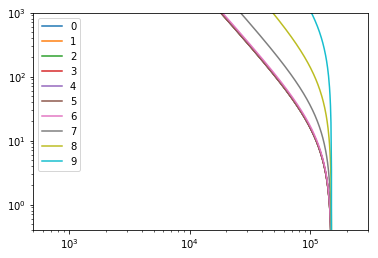

In [3]:
for i in range(len(total_amount)):
    plt.loglog(drange, total_amount[i], label=i)

plt.legend()
plt.ylim([4e-1, 1e3])
plt.xlim([5e2, 3e5])
plt.show()